In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
np.random.seed(0)

In [5]:
class Canvas:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.area = width * height
        
        
class Sml_rec:
    
    def __init__(self, height, width, flip, bound, shape = None):
        
        self.f = flip
        self.bound = bound
        self.shape = shape
        self.length_width = len(bin(bound.width))-2
        self.length_height = len(bin(bound.height))-2
        code_width = '{0:0rb}'.replace('r',f'{self.length_width}')
        code_height = '{0:0rb}'.replace('r',f'{self.length_height}')
        
        if flip:
            self.width = width
            self.height = height
            self.area = width * height
            self.p1 = np.random.randint(0, bound.height - self.height + 1)
            self.p2 = np.random.randint(0, bound.width - self.width + 1)
        else:
            self.width = height
            self.height = width
            self.area = width * height
            self.p1 = np.random.randint(0, bound.height - self.height)
            self.p2 = np.random.randint(0, bound.width - self.width)
            
        self.dna = code_height.format(self.p1) + code_width.format(self.p2) + f'{self.f}'

    
        if self.shape is None:
            a = np.zeros(bound.area).reshape(bound.height,bound.width)
            a[self.p1:self.p1 + self.height, self.p2:self.p2 + self.width] = 1
        
        else:
            a = np.zeros(bound.area).reshape(bound.height,bound.width)
            a[self.p1:self.p1 + self.height, self.p2:self.p2 + self.width] = self.shape
            
        self.phenotype = a
        
        
class Body:
    def __init__(self, organ, canvas):
        self.organ = organ
        self.canvas = canvas
        self.body = [Sml_rec(o[0], o[1], o[2], canvas, o[3]) for o in organ]
        self.dna = ''.join([b.dna for b in self.body])
        self.dna_length = len(self.dna)
        self.num_of_organ = len(self.body)
        self.dna_length_per_organ = self.dna_length // self.num_of_organ
        
#     def split_part(a, n):
#         k, m = divmod(len(a), n)
#         return (a[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in range(n))
    
    def xover(self, other):
        index = math.floor(random.random() * self.dna_length)
        chl1_dna = self.dna[:index] + other.dna[index:]
        chl2_dna = other.dna[:index] + self.dna[index:]
        
        chl1_body = Body(self.organ, self.canvas)
        chl1_body.dna = chl1_dna
        
        chl2_body = Body(self.organ, self.canvas)
        chl2_body.dna = chl2_dna
        
        return chl1_body, chl2_body
    
    def mutate(self):
        position = np.random.randint(0, self.dna_length)
        
        if self.dna[position] == '1':
            self.dna = self.dna[:position] + '1' + self.dna[position+1:]
        else:
            self.dna = self.dna[:position] + '0' + self.dna[position+1:]
            
    def evaluate(self, show=False):
        
        b = sum([g.phenotype for g in self.body])
        
        border = np.where(b>0)
        area = b.shape[0]*b.shape[1]

        border_score = (border[0][0]*b.shape[1] + border[1][0]*b.shape[0]) / area

        none_overlab_score = np.sum(b <= 1) / area

        if show:
            plt.imshow(b)
            
        return 0.1 * border_score + 0.9 * none_overlab_score
        #return border_score
    
    def fight(self, other):
        if self.evaluate() > other.evaluate():
            return self
        else:
            return other

In [6]:
n_iter = 1000
n_sel = 500
n_xover = 500
p_mutate = 0.2
n_pop = n_sel + n_xover
i = 0
max_score = 0
A1 = np.ones(15*15).reshape(15,15)
A1[4:11,4:11] = 0

A2 = np.ones(7*7).reshape(7,7)
A2[2:5,2:5] = 0

bound = Canvas(50,30)
organ = [[15,15,0,A1], [7,7,0, A2], [15,5,0,None], [15,5,1,None], [5,5,0, None], [3,3,0, None]]
pop_list = [Body(organ, bound) for _ in range(n_pop)]

while i <= n_iter:

    i+=1

    pop_eval = [b.evaluate() for b in pop_list]

    generation = sorted([[ls,ev] for ls, ev in zip(pop_list, pop_eval)],key=lambda x: x[1],reverse=True)
 
    survivor = [x[0] for x in generation]

    new_gen = survivor[:n_sel]
    
            
    for _ in range(n_sel, n_pop, 2):
        
        index1,index2,index3,index4 = [random.randint(0, n_sel-1) for _ in range(4)]

        parent1 = new_gen[index1].fight(new_gen[index2])
        parent2 = new_gen[index3].fight(new_gen[index4])
        
        offsprint1, offsprint2 = parent1.xover(parent2)
        
            
        if random.uniform(0,1) < p_mutate:
            offsprint1.mutate()

        new_gen.append(offsprint1)
        new_gen.append(offsprint2)
        
    pop_list = new_gen
    if generation[0][1] > max_score:
        max_score = generation[0][1]
        print(max_score)


0.9886666666666667
0.998
1.0010000000000001
1.0010666666666668
1.0116666666666667
1.0118
1.0126
1.0148666666666666
1.0168
1.0266666666666666


1.0266666666666666

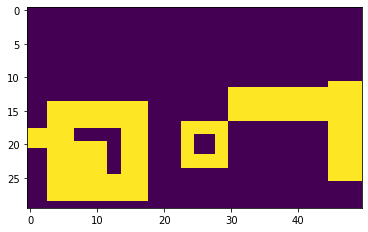

In [7]:
generation[0][0].evaluate(show=True)